In [1]:
# prerequisite
# pip install -U imbalanced-learn

In [2]:
from pipelines.DataPipeline import DataPipeline
from transformers.Preprocessing import Preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from utils.Common import Config

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import joblib

In [3]:
RAW_DATA_PATH = "../data/raw/KSI.csv"
df = pd.read_csv(RAW_DATA_PATH)

In [4]:
# fill missing values, adding new columns, extracting useful columns
pc = Preprocessing(df, Config.binary_columns, Config.cat_attribs, Config.num_attribs, Config.label)
new_df = pc.getFrame()

In [5]:
# seperate feature and label
X = new_df[Config.cat_attribs + Config.num_attribs+ Config.binary_columns]
Y = new_df[Config.label]

In [6]:
# pass feature to pipeline and convert it to numerical data
dp = DataPipeline(Config.num_attribs,Config.cat_attribs)
X = dp.process(X)

In [7]:
X.isna().sum().sum()

0

In [8]:
Y.value_counts().tolist()

[14246, 2201]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=Config.test_size, stratify=Y, random_state=42)

In [10]:
smote_minority = SMOTE(sampling_strategy = "minority", random_state=42)
X_train_sm, y_train_sm = smote_minority.fit_resample(X_train, y_train)


In [11]:

# Create param grid

dc_clf = joblib.load('../models/best_model_decision_tree.pkl')

abc_clf = AdaBoostClassifier(base_estimator = dc_clf, n_estimators = 50, learning_rate=1, algorithm='SAMME')

abc_clf.fit(X_train_sm, y_train_sm)


AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=19,
                                                         min_samples_leaf=4,
                                                         min_samples_split=45),
                   learning_rate=1)

In [12]:
abc_clf.score(X_train, y_train)

1.0

In [13]:
abc_clf.score(X_train_sm, y_train_sm)

1.0

In [14]:
abc_clf.score(X_test, y_test)

0.9778115501519757

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


y_train_pred = abc_clf.predict(X_train)
y_train_sm_pred = abc_clf.predict(X_train_sm)
y_test_pred = abc_clf.predict(X_test)


print(classification_report(y_train,y_train_pred))
print(classification_report(y_train_sm,y_train_sm_pred))
print(classification_report(y_test,y_test_pred))

print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_train_sm,y_train_sm_pred))
print(accuracy_score(y_test,y_test_pred))

print(precision_score(y_train,y_train_pred))
print(precision_score(y_train_sm,y_train_sm_pred))
print(precision_score(y_test,y_test_pred))

print(recall_score(y_train,y_train_pred))
print(recall_score(y_train_sm,y_train_sm_pred))
print(recall_score(y_test,y_test_pred))

print(f1_score(y_train,y_train_pred))
print(f1_score(y_train_sm,y_train_sm_pred))
print(f1_score(y_test,y_test_pred))

print(confusion_matrix(y_train,y_train_pred))
print(confusion_matrix(y_train_sm,y_train_sm_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11396
           1       1.00      1.00      1.00      1761

    accuracy                           1.00     13157
   macro avg       1.00      1.00      1.00     13157
weighted avg       1.00      1.00      1.00     13157

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11396
           1       1.00      1.00      1.00     11396

    accuracy                           1.00     22792
   macro avg       1.00      1.00      1.00     22792
weighted avg       1.00      1.00      1.00     22792

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2850
           1       0.99      0.85      0.91       440

    accuracy                           0.98      3290
   macro avg       0.98      0.92      0.95      3290
weighted avg       0.98      0.98      0.98      3290

1.0
1.0
0.977811550

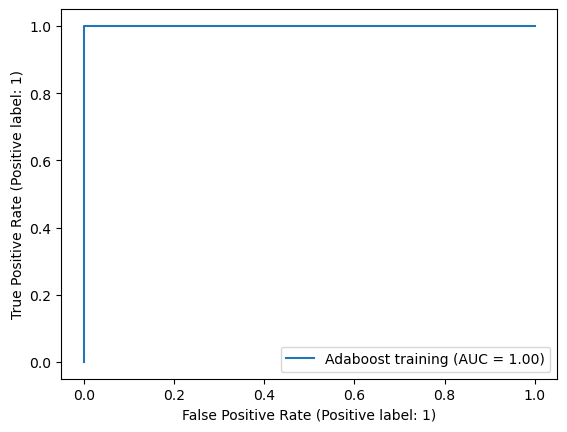

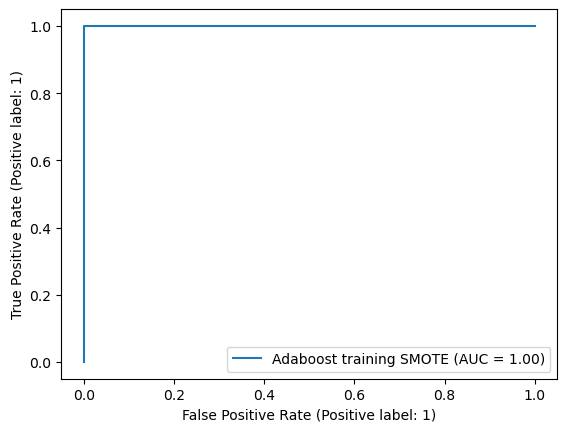

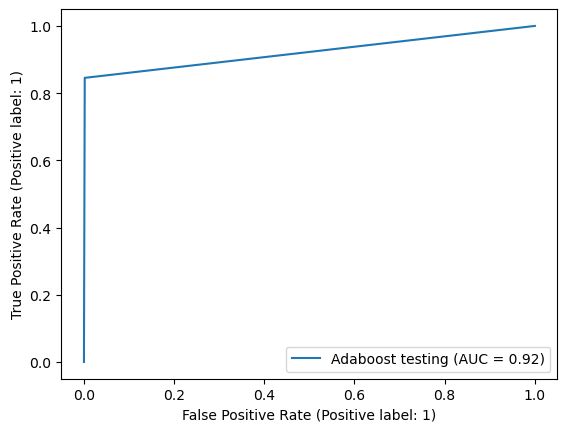

In [16]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
RocCurveDisplay.from_predictions(y_train, y_train_pred, name="Adaboost training")
RocCurveDisplay.from_predictions(y_train_sm,y_train_sm_pred, name="Adaboost training SMOTE")
RocCurveDisplay.from_predictions(y_test, y_test_pred, name="Adaboost testing")
plt.show()

In [17]:
abc_clf.base_estimator_

DecisionTreeClassifier(max_depth=19, min_samples_leaf=4, min_samples_split=45)

In [18]:
import joblib

joblib.dump(abc_clf,'../models/best_model_adaboost.pkl')


['../models/best_model_adaboost.pkl']